In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### Загрузим данные [соревнования Rossmann Store Sales](https://www.kaggle.com/c/rossmann-store-sales)

In [2]:
train  = pd.read_csv("train_sem12.csv")

D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
stores = pd.read_csv("https://raw.githubusercontent.com/iad34/seminars/master/materials/store_sem12.csv")

In [5]:
stores.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
train.shape

(1017209, 9)

In [7]:
stores.shape

(1115, 10)

In [8]:
data = pd.merge(train, stores, on="Store")

In [9]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [10]:
# train test split
idxs = np.random.permutation(np.arange(data.shape[0]))
train_idxs = idxs[:len(idxs)//2]
test_idxs = idxs[len(idxs)//2:]

### Визуализация PCA
Sales и Customers связаны, поэтому можно из них сделать один признак 
(правда это чисто для демонстрации, ведь эту величину мы предсказываем)

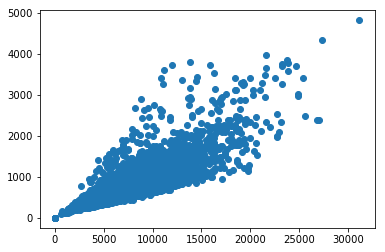

In [11]:
plt.scatter(data["Sales"][::100], data["Customers"][::100])

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(1)
components = pca.fit_transform(data[["Sales", 'Customers']])

In [14]:
pca.components_ # матрица W вкладов стархы признаков в новые

array([[ 0.9941932 ,  0.10760989]])

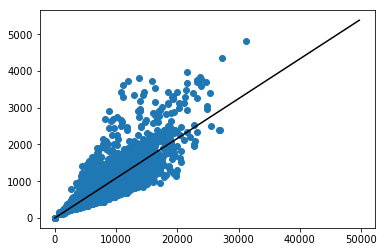

In [15]:
plt.scatter(data["Sales"][::100], data["Customers"][::100])
v = pca.components_[0]
plt.plot([0, v[0]*50000], [0, v[1]*50000], color="black")

PCA выбирает напарвление, вдоль которого данные "вытянуты", чтобы сохранить как омжно больше информации

Начнем решать задачу

In [41]:
# первое решение - саааамое простое: оставим только понятные числовые столбцы без нанов
######## Задача 1
data_simple = data[['DayOfWeek', "Open", "SchoolHoliday", "CompetitionDistance",\
                   "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"]].fillna(0)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
clf = LinearRegression()
clf.fit(data_simple.ix[train_idxs], data["Sales"][train_idxs])
pred = clf.predict(data_simple.ix[test_idxs])

In [44]:
def rmspe(target, predicted):
    mask = target != 0
    return np.sqrt((((target-predicted)/target)**2)[mask].mean())

In [45]:
(data["Sales"][test_idxs], pred) ### !!!!!!!!!!! data вместо train

0.58573694527679232

### Визуализация данных в двумерном пространстве

In [21]:
pca = PCA(2)
points = pca.fit_transform(data_simple)

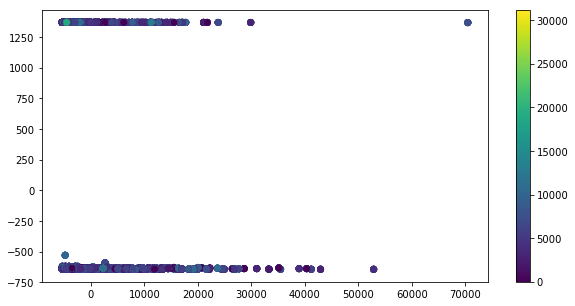

In [27]:
plt.figure(figsize=(10, 5))
plt.scatter(points[::100, 0], points[::100, 1], c=data["Sales"][::100])
plt.colorbar()

tSNE стремится расположить точки в низкоразмерном пространстве так, чтобы сохранить пропорции в расстояниях

In [33]:
from sklearn.manifold import TSNE
from sklearn.manifold import MDS

In [30]:
tsne = TSNE()
points = tsne.fit_transform(data_simple[::1000])

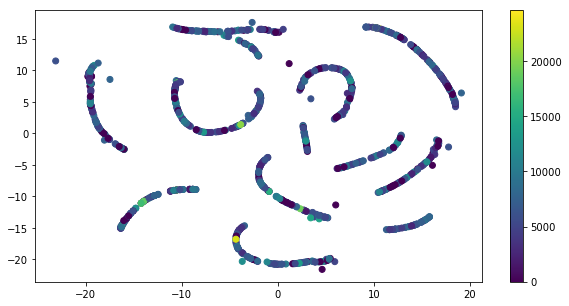

In [31]:
plt.figure(figsize=(10, 5))
plt.scatter(points[:, 0], points[:, 1], c=data["Sales"][::1000])
plt.colorbar()

MDS стремится расположить точки в низкоразмерном пространстве так, чтобы сохранить расстояния

In [34]:
tsne = MDS()
points = tsne.fit_transform(data_simple[::1000])

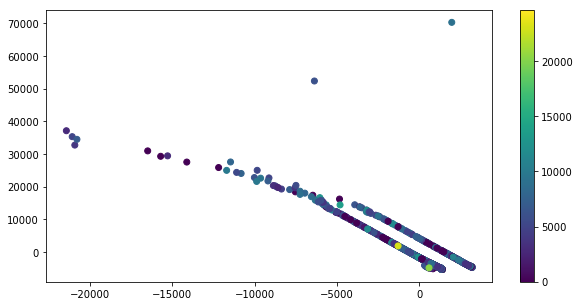

In [35]:
plt.figure(figsize=(10, 5))
plt.scatter(points[:, 0], points[:, 1], c=data["Sales"][::1000])
plt.colorbar()

Самое простое улучшение признакового пространства - бинарная кодировка категориальных признаков

In [46]:
data_ohe = pd.get_dummies(data[data.columns[1:2].tolist()+data.columns[3:-3].tolist()],
                         columns=["DayOfWeek", "StoreType", "Assortment", \
                                 "StateHoliday"]).drop(["Sales", "Customers"], axis=1).fillna(0)

In [47]:
clf = LinearRegression()
clf.fit(data_ohe.ix[train_idxs], data["Sales"][train_idxs])
pred = clf.predict(data_ohe.ix[test_idxs])
rmspe(data["Sales"][test_idxs], pred) ### !!!!!!!!!!! data вместо train

0.511518227668739

Автоматический метод генерации признаков - с помощью кластеризации (признак - расстояние до центрво кластеро)

Число кластеров взяди по визуализации

In [48]:
from sklearn.cluster import KMeans

In [60]:
km = KMeans(12)
features1 = km.fit_transform(data_ohe.ix[train_idxs][:100000])
features2 = km.transform(data_ohe.ix[train_idxs][100000:])
features_test = km.transform(data_ohe.ix[test_idxs])

In [61]:
features_train = pd.DataFrame(data=np.vstack((features1, features2)), index=train_idxs)
features_test = pd.DataFrame(data=features_test, index=test_idxs)

In [62]:
data_cl_train = pd.concat([data_ohe.ix[train_idxs], features_train], axis=1)
data_cl_test = pd.concat([data_ohe.ix[test_idxs], features_test], axis=1)

In [63]:
clf = LinearRegression()
clf.fit(data_cl_train, data["Sales"][train_idxs])
pred = clf.predict(data_cl_test)
rmspe(data["Sales"][test_idxs], pred) ### !!!!!!!!!!! data вместо train

0.50966843623374902

Для линейного метода это и не должен быть крутой признак, для более сложных - возможно

А теперь придумаем признак головой, хорошо посмотрев на данные - среднее число продаж в магазине до текущего дня (соответствующего транзакции)

In [81]:
data_enc = pd.get_dummies(data[data.columns[:-3]], columns=["DayOfWeek", "StoreType", "Assortment", \
                                                           "StateHoliday"])
data_tr_sort = data_enc.sort_values(by="Date")
data_tr_sort["Store_mean_sales"] = \
data_tr_sort.groupby("Store")["Sales"].apply(lambda x: (np.cumsum(x)-x)/np.arange(1, len(x)+1))
data_enc = data_tr_sort.fillna(0).drop("Sales", axis=1).drop(['Date', 'Store', 'Customers'], axis=1)

In [82]:
clf = LinearRegression()
clf.fit(data_enc.ix[train_idxs], data["Sales"][train_idxs])
pred = clf.predict(data_enc.ix[test_idxs])
rmspe(data["Sales"][test_idxs], pred) ### !!!!!!!!!!! data вместо train

0.29277574318342359

Если убрать -x, будем заглядывать в целевой признак и немног оулучшим предсказания